In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns

import scipy as scipy
import scipy.signal
from pathlib import Path

from SyringePumpAux import *

In [2]:
#Global Viz settings
sns.set_context('paper') # darkgrid, white grid, dark, white and ticks
plt.rc('axes', titlesize=18)     # fontsize of the axes title
plt.rc('axes', labelsize=14)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=13)    # fontsize of the tick labels
plt.rc('ytick', labelsize=13)    # fontsize of the tick labels
plt.rc('legend', fontsize=13)    # legend fontsize
plt.rc('font', size=13)          # controls default text sizes
plt.rc("axes.spines", top=False, right=False)

mpl.rcParams['pdf.fonttype'] = 42
mpl.rcParams['ps.fonttype'] = 42
mpl.rcParams['font.family'] = 'Arial'

default_fig_size = (6,4)
figureTargetFolder = Path(r"C:\Users\bruno.cruz\Downloads\ExperimentalData\Figures")

In [3]:
dataRoot = Path(r"C:\Users\bruno.cruz\Downloads\ExperimentalData")
#Downloadable from https://drive.google.com/drive/u/1/folders/119J9gjGana1xsALLQBQV9rI2lKPQoyFM

ephysPath = "pump1ephysData2021-02-27T17_29_06.bin"
analogPath = "pump1AnalogData2021-02-27T17_29_06.bin"

Fs = 30e3

stepTTL = np.fromfile(dataRoot / analogPath, dtype=np.int16).reshape((-1,8))[:,2]

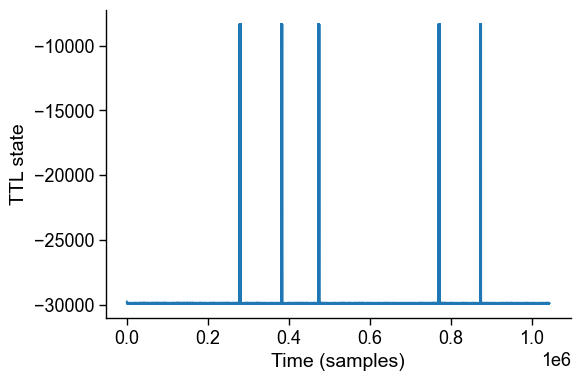

-15000.0


In [4]:
fig,ax = plt.subplots(figsize = default_fig_size)
plt.plot(stepTTL)
plt.ylabel('TTL state') 
plt.xlabel('Time (samples)')
plt.show()
analogThr = -15e3
stepTTL = (stepTTL > analogThr).astype(np.int8)
print(analogThr)

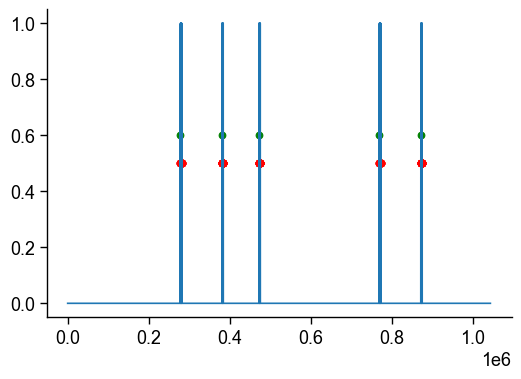

[[278146]
 [380625]
 [472064]
 [769301]
 [871659]]


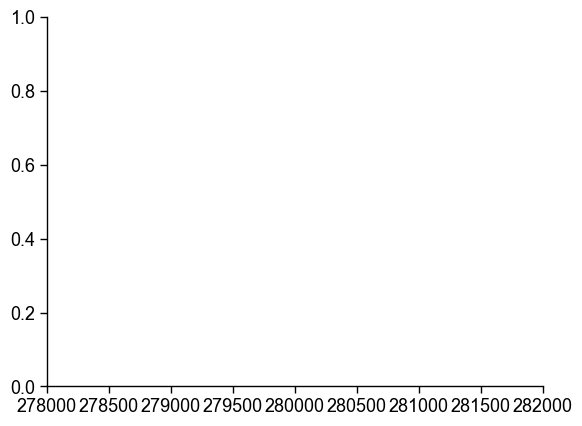

In [5]:

pulseOnsets = np.argwhere((np.diff(stepTTL) == 1))
trainOnsets = pulseOnsets[np.argwhere(np.diff(pulseOnsets, axis = 0) > 150)[:,0] + 1] #shift the index by 1 to account for the derivative indexing
trainOnsets = np.insert(trainOnsets, 0, pulseOnsets[0], axis = 0) #prepend the first pulse
fig,ax = plt.subplots(figsize = default_fig_size)
plt.plot(stepTTL)
plt.scatter(pulseOnsets, pulseOnsets * 0 + 0.5, c = 'red')
plt.scatter(trainOnsets, trainOnsets * 0 + 0.6, c = 'green')
plt.show()
plt.xlim((0.278e6, 0.282e6))
#plt.xlim((0.278e6, 0.2782e6))
print(trainOnsets)

In [6]:
EphysData = np.fromfile((dataRoot / ephysPath), dtype=np.int16).reshape((-1,64))
meanChannel = np.mean(EphysData, axis = 1)


C:\Users\bruno.cruz\Downloads\ExperimentalData\Figures\Ephys validation.pdf


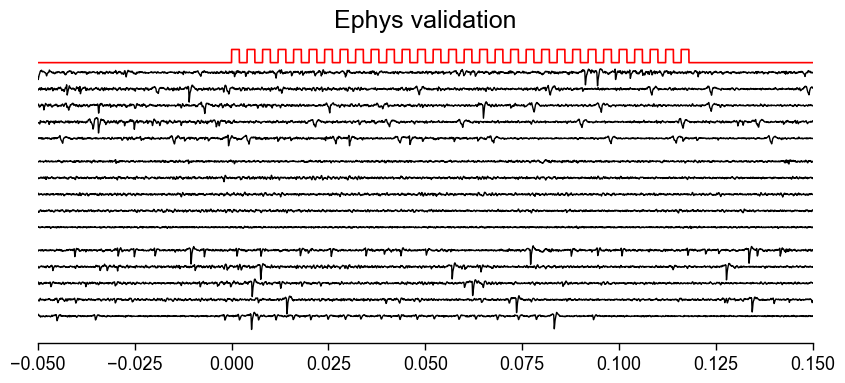

In [7]:

WOI = np.array([-0.05,0.15])
samples2take = [np.floor((x + WOI*Fs)).astype(int) for x in trainOnsets]
ts = np.linspace(WOI[0], WOI[1], np.floor(samples2take[0][1] - samples2take[0][0]).astype(int))
b,a = scipy.signal.butter(2, [300, 8000], btype = 'bandpass', fs = Fs)
#b,a = scipy.signal.butter(2, 50, btype = 'highpass', fs = Fs)

fig = plt.figure(figsize = (10,4))
ax = fig.add_subplot(1,1,1)
plotOffset = 500
ch_plotOffset = 200

channels2plot = [0,1,22]
cY = 0
colorArray = ['Purple', 'Green']
for ii, channel_idx in enumerate(channels2plot):
    channel2plot = EphysData[:,channel_idx] * 0.195 - 6389.76
    channel2plot = scipy.signal.filtfilt(b,a,channel2plot)
    for jTrain in range(0, trainOnsets.shape[0]):
        cSamples = samples2take[jTrain]
        plt.plot(ts, channel2plot[cSamples[0]: cSamples[1]] + plotOffset * cY + ch_plotOffset*ii, c = 'black', linewidth = 1)
        cY+=1

plt.plot(ts, stepTTL[cSamples[0]: cSamples[1]] * 400  + plotOffset * (cY) + ch_plotOffset, c = 'red')


ax.set_xlabel = "Time (s)"
ax.set_ylabel = "ADC (V)"

right_side = ax.spines["right"]
right_side.set_visible(False)
top_side = ax.spines["top"]
top_side.set_visible(False)
top_side = ax.spines["left"]
top_side.set_visible(False)
plt.yticks([], [])
plt.xlim((-0.05, 0.15))
plt.title('Ephys validation')
saveFigure(fig, rootSaveFolder = figureTargetFolder)
plt.show()


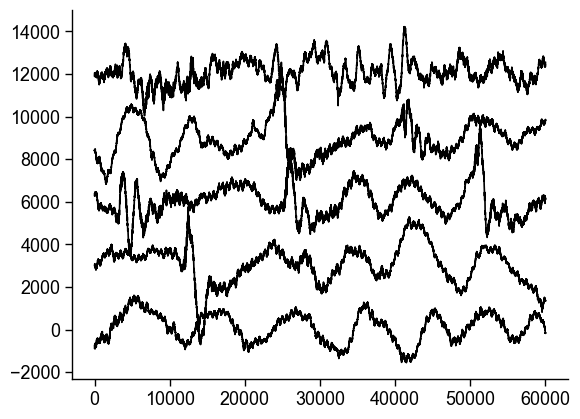

In [8]:
WOI = np.array([-1,1])
samples2take = [np.floor((x + WOI*Fs)).astype(int) for x in trainOnsets]

plt.figure()
for jTrain in range(0, trainOnsets.shape[0]):
    cSamples = samples2take[jTrain]
    plt.plot(meanChannel[cSamples[0]: cSamples[1]] + 3000 * jTrain, c = 'black')
plt.show()
    